### Basic NN -
1. Input Layer
    - Inputs
    - Weights
    - Biases
2. Hidden Layer
    - Submission
    - Activation
3. Output Layer

In [1]:
# inputs, weights and bias
inputs = [1, 2, 3]
weights = [-1, 2, 0.5]
bias = 3

# output = sum(intputs[i] * weights[i]) + bias
output = bias
for i, j in zip(inputs, weights):
    output += i * j

print('Output:', output)

Output: 7.5


In [2]:
# let's add 3 nodes in the next layer

inputs = [1, 2, 3, 2.5]

weights_1 = [0.2, 0.8, -0.5, 1.0]
weights_2 = [0.5, -0.91, 0.26, -0.5]
weights_3 = [-0.26, -0.27, 0.17, 0.87]

bias_1 = 2
bias_2 = 3
bias_3 = 0.5

# layer 1
output_1 = bias_1
for i, j in zip(inputs, weights_1):
    output_1 += i * j

# layer 2
output_2 = bias_2
for i, j in zip(inputs, weights_2):
    output_2 += i * j

# layer 3
output_3 = bias_3
for i, j in zip(inputs, weights_3):
    output_3 += i * j

output = [output_1, output_2, output_3]

print(f'Output: {output}')

Output: [4.800000000000001, 1.21, 2.385]


In [3]:
inputs = [1, 2, 3, 2.5]
node_weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

# funtional dynamic approach
outputs = []
for weights, bias in zip(node_weights, biases):
    node_output = bias
    for input, weight in zip(inputs, weights):
        node_output += input * weight
    outputs.append(node_output)

print(f"Output: {outputs}")

Output: [4.800000000000001, 1.21, 2.385]


### Difference between weights and biases -

**Weights** are used to scale up or scale down a certain input value -> `input * weight` <br>
- weights determine how much importance to give to a node's input influencing the final output.
$$
input = -0.5, weight = 0.7 \\
input * weight = -0.5 * 0.7 = -0.35
$$

**Biases** are used to produce non-zero values by adding some constant value -> `input + bias` <br>
- biases are used to adjust decision boundary, allowing better fitting of training data.
$$
input = -0.5, bias = 0.7 \\
input + bias = -0.5 + 0.7 = 0.2
$$

<div style="text-align: center;">
    <br>
    <h3>Effect of <i>Bias</i> and <i>Weight</i> -</h3> 
    <img src="../assets/tests/bias-&-weight-effect.png" alt="Effect of Bias and Weights" style=" width: 60%;">
</div>

### Shape - 
$$
Array: [1, 4, 2, 8, 9] \\ Shape: (5,), \ Type: 1D \ Aarray, \ Vector
\\ \ \\
2D Array: [ \ [1, 2, 3], \ [4, 5, 6] \ ] \\ Shape: (2, 3), \ Type: 2D \ Array, \ Matrix
\\ \ \\
3D Array: [ \ [ \ [1, 2], [3, 4] \ ], \ [ \ [5, 6], [7, 8] \ ] \ ] \\ Shape: (2, 2, 2), \ Type: 3D \ Array, \ Tensor
$$

### Dot Product - 
$$
\text{Dot Product of Vectors:} \\
\mathbf{a} = [a_1, a_2, a_3], \ \mathbf{b} = [b_1, b_2, b_3] \\
\mathbf{a} \cdot \mathbf{b} = a_1 \cdot b_1 + a_2 \cdot b_2 + a_3 \cdot b_3 \\
\\ \ \\
\text{Example:} \\
\mathbf{a} = [1, 2, 3], \ \mathbf{b} = [4, 5, 6] \\
\mathbf{a} \cdot \mathbf{b} = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 4 + 10 + 18 = 32
$$

In [4]:
# importing numpy for complex operations
import numpy as np

In [5]:
# dot product
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot(inputs, weights) + bias
print('Output:', output)

Output: 4.8


In [6]:
# dot product for layers
inputs = [1, 2, 3, 2.5]
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

outputs = np.dot(weights, inputs) + biases # NOTE: this time we have put weights first (can't interchange them)
print('Output:', outputs)

"""
What's happening ?

>> np.dot(weights, inputs) = [np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)] = [2.8, -1.79, 1.885]

>> [2.8, -1.79, 1.885] + [2, 3, 0.5] = [4.8, 1.21, 2.385] (result)
"""

Output: [4.8   1.21  2.385]


"\nWhat's happening ?\n\n>> np.dot(weights, inputs) = [np.dot(weights[0], inputs), np.dot(weights[1], inputs), np.dot(weights[2], inputs)] = [2.8, -1.79, 1.885]\n\n>> [2.8, -1.79, 1.885] + [2, 3, 0.5] = [4.8, 1.21, 2.385] (result)\n"

In [7]:
"""
We'll now be using batches for multiple layers and nodes. But why batches?
- helps with generalization (https://youtu.be/TEWy9vZcxW4?si=yWBcVOBTcUBNLZOf&t=295)
- can calculated things in parallel (GPU (100s of cores) > CPU (8-12 cores))

But why not just give all the data samples at once (why batches)?
- could lead to overfitting

A batch size of `32` is commonly used. (but it can be more or less)
"""

# shape - (3, 4)
inputs = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]
# shape - (3, 4)
weights = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases = [2, 3, 0.5]

# we can't do np.dot(weights, inputs) --> will give shape error `ValueError: shapes (3,4) and (3,4) not aligned: 4 (dim 1) != 3 (dim 0)`

output = np.dot(inputs, np.array(weights).T) + biases # the dimensions of weights.T is (4, 3) -> (3,4) and (4,3) ==> (3, 3)
print('Output:\n', output)

Output:
 [[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


Transpose of weights ~ <br>
<img src="../assets/tests/transpose-weights.png" width="600px">

Adding the biases ~ <br>
<img src="../assets/tests/bias-add.png" width="600px">

In [8]:
# add multiple layers

inputs = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# later 1
weights_1 = [
    [0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]
biases_1 = [2, 3, 0.5]

# layer 2
weights_2 = [
    [0.1, -0.14, 0.5],
    [-0.5, 0.12, -0.33],
    [-0.44, 0.73, -0.13]
]
biases_2 = [-1, 2, -0.5]

layer_1_outputs = np.dot(inputs, np.array(weights_1).T) + biases_1
layer_2_outputs = np.dot(layer_1_outputs, np.array(weights_2).T) + biases_2

print('Layer 2 Output:\n',layer_2_outputs)

Layer 2 Output:
 [[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [9]:
np.random.seed(0)

# input -> X
X = [
    [1, 2, 3, 2.5],
    [2, 5, -1, 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# defining 2 hidden layers
class Layer_Dense:
    # randomly generating weights and setting biases as zeros
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer_1 = Layer_Dense(4, 5) # 4 is number of inputs, and 5 is number of neurons which can be any number (like 512, 256 etc...)
layer_2 = Layer_Dense(5, 2) # 5 is the n_inputs value which needs to be same as previous neuron's width and 2 can be any number

layer_1.forward(X) # will store the output in `layer_1.output`
print('Layer 1 Output:\n', layer_1.output)

layer_2.forward(layer_1.output) # as the layer 1 output becomes intput to 2nd layer
print('Layer 2 Output:\n', layer_2.output)


Layer 1 Output:
 [[ 0.10758131  1.03983522  0.24462411  0.31821498  0.18851053]
 [-0.08349796  0.70846411  0.00293357  0.44701525  0.36360538]
 [-0.50763245  0.55688422  0.07987797 -0.34889573  0.04553042]]
Layer 2 Output:
 [[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


**Activation Functions - Adds non-linearity to the network ~**

<img src="../assets/tests/activation-function-example.png" width="300px">

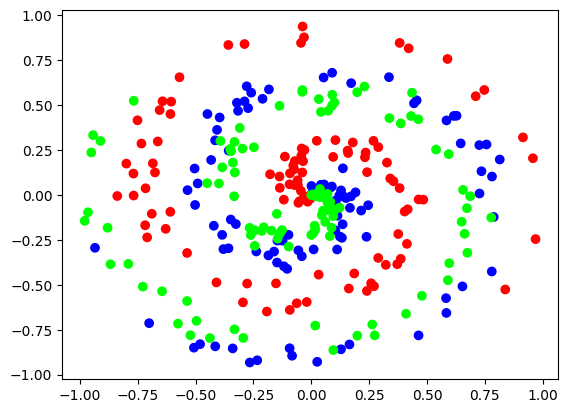

In [10]:
# custom made data for now - spiral data points generation for non-linear data
np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points * classes, 2))
    y = np.zeros(points * classes, dtype='uint8')

    for class_number in range(classes):
        ix = range(points * class_number, points * (class_number + 1))
        r = np.linspace(0.0, 1, points) # radius
        t = np.linspace(class_number * 4, (class_number + 1) * 4, points) + np.random.randn(points) * 0.2
        X[ix] = np.c_[r * np.sin(t * 2.5), r * np.cos(t * 2.5)]
        y[ix] = class_number
    return X, y

# visualization of data --> using matplotlib
import matplotlib.pyplot as plt
X, y = create_data(100, 3) # 3 classes for 100 points each

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

In [11]:
# ACTIVATION FUNCTIONS - to add non-linearity to our neural networks so that they can fit better

# importing nnfs for data
import nnfs
from nnfs.datasets import spiral_data

X, y = spiral_data(100, 3)

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

class Activation_ReLU():
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer1 = Layer_Dense(2, 5)
activation = Activation_ReLU()

layer1.forward(X)
activation.forward(layer1.output)

print(f"After using ReLU: \n{activation.output = }")

After using ReLU: 
activation.output = array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.00027121, 0.        , 0.00026233, 0.        ],
       [0.        , 0.        , 0.        , 0.00029877, 0.        ],
       ...,
       [0.15903222, 0.        , 0.1166153 , 0.        , 0.14184746],
       [0.16403009, 0.        , 0.15140174, 0.        , 0.14257608],
       [0.15084316, 0.        , 0.0833516 , 0.        , 0.13780962]])


In [19]:
# SOFTMAX ACTIVATION FUNCTION
layer_outputs = [4.8, 1.21, 2.385]

# E = 2.7182812846 # euler's number
import math
E = math.e

exp_values = [E ** num for num in layer_outputs]
print(f'{exp_values = }')

# let's normalize these to get the probabilities
norm_base = sum(exp_values)
norm_values = [exp / norm_base for exp in exp_values]
print(f'{norm_values = }')

# sum of all the probabilites should be close to 1
print(f'{sum(norm_values) = }')

exp_values = [121.51041751873483, 3.353484652549023, 10.859062664920513]
norm_values = [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
sum(norm_values) = 0.9999999999999999


**_Softmax Activation_** 

$$
S_{i, j} = \frac{e^{z_{i,j}}}{\sum^{L}_{l=1}e^{z_{i,j}}}
$$

<br>
<img src="../assets/tests/softmax-function.png" width="600px">

In [44]:
# applying the softmax for a batch

class Activation_SoftMax:
    def forward(self, inputs):
        # we are subtracting with max to keep it in bounded, now 1 is the max value
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # axis(1) - as inputs is a batch we need max for each row not entire batch
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3) # input is (x, y) data so 2
relu = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
softmax = Activation_SoftMax()

dense1.forward(X)
relu.forward(dense1.output)

dense2.forward(relu.output)
softmax.forward(dense2.output)

print(softmax.output[:5]) # will be 300 values

[[0.33333333 0.33333333 0.33333333]
 [0.33342336 0.33328671 0.33328993]
 [0.33346444 0.33326301 0.33327255]
 [0.33350302 0.33324084 0.33325615]
 [0.33373331 0.33313544 0.33313124]]
